# Machine Learning Homework3 Bank Prediction

### 作業說明

1.	讀取金融市場行銷數據Bank.csv檔案，共有17個特徵與45,211筆樣本。
2.	取出age、balance、duration、campaign、previous五個特徵、進行標準化。
3.	以k-means進行分群
  * 透過散佈圖、轉折圖、輪廓係數、調整蘭德指數決定集群數量。
  * 以上題決定的集群數量進行分群，統計每個集群的大小，並以表格、長條圖與熱度圖進行分群結果的分析說明。
4.	以ward linkage策略的凝聚分群法進行分群，統計每個集群的大小，繪製散佈圖、樹狀圖、熱度圖，並計算輪廓係數、調整蘭德指數。
5.	以DBSCAN進行分群，統計每個集群的大小，繪製散佈圖，並計算輪廓係數、調整蘭德指數。
6.	以鄰近傳播進行分群，統計每個集群的大小，繪製散佈圖，並計算輪廓係數、調整蘭德指數。
7.	以表格彙整4種分群方法的結果，並進行綜合分析。


### 1 讀取檔案

讀取金融市場行銷數據Bank.csv檔案，共有17個特徵與45,211筆樣本。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice as randChoice
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation

In [ ]:
bankData = pd.read_csv("path/Homework3_Bank.csv")
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# X
trainData = bankData[["age", "balance", "duration", "campaign", "previous"]]
# Y
trueData = bankData[["loan"]]
trueData.loc[trueData["loan"] == "no", "loan"] = 0
trueData.loc[trueData["loan"] == "yes", "loan"] = 1
trueData["loan"] = trueData["loan"].astype('int64')

# show X
trainData.info()
trainData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   duration  45211 non-null  int64
 3   campaign  45211 non-null  int64
 4   previous  45211 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

age        balance      duration      campaign      previous
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000
mean      40.936210    1362.272058    258.163080      2.763841      0.580323
std       10.618762    3044.765829    257.527812      3.098021      2.303441
min       18.000000   -8019.000000      0.000000      1.000000      0.000000
25%       33.000000      72.000000    103.000000      1.000000      0.000000
50%       39.000000     448.000000    180.000000      2.000000      0.000000
75%       48.000000    1428.000000    319.000000      3.000000      0.000000
max       95.000000  102127.000000   4918.000000     63.000000    275.000000

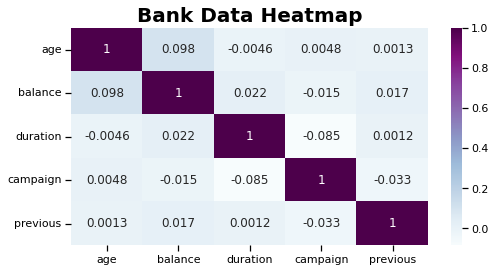

In [ ]:
sns.set_context('notebook')
plt.figure(figsize=(8, 4))
trainDataCorrelations = trainData.corr()
sns.heatmap(trainDataCorrelations, cmap="BuPu", annot=True)
plt.title("Bank Data Heatmap", fontsize = 20, fontweight = 'bold')
plt.xlabel("")
plt.ylabel("")
plt.show()

### 2 特徵標準化

取出age、balance、duration、campaign、previous五個特徵、進行標準化。

In [ ]:
# X
trainDataColumnName = trainData.columns
trainData = pd.DataFrame(scale(trainData))
trainData.columns = trainDataColumnName

trainData.describe()

age       balance      duration      campaign      previous
count  4.521100e+04  4.521100e+04  4.521100e+04  4.521100e+04  4.521100e+04
mean   5.222844e-16  3.070663e-15  5.560938e-17  1.254699e-14  1.355210e-13
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00
min   -2.159994e+00 -3.081149e+00 -1.002478e+00 -5.693506e-01 -2.519404e-01
25%   -7.473845e-01 -4.237719e-01 -6.025167e-01 -5.693506e-01 -2.519404e-01
50%   -1.823406e-01 -3.002800e-01 -3.035165e-01 -2.465603e-01 -2.519404e-01
75%    6.652252e-01  2.158743e-02  2.362370e-01  7.622994e-02 -2.519404e-01
max    5.091402e+00  3.309478e+01  1.809470e+01  1.944365e+01  1.191360e+02

In [ ]:
# clusterData 用以儲存訓練資料和分群結果
clusterData = pd.concat([trainData, trueData], axis=1)
# 用於k-means以外，計算量較大的模型
subData = clusterData.sample(n=1000)

### 3-0 繪圖函式

In [ ]:
# scatter setting
dotSize = 30
dotAlpha = 0.4
hexColorList = ['#FFB5B5', '#FFAD86', '#FFE66F', '#CCFF80', '#A3D1D1', '#9999CC', '#8F4586', '#804040']
centerSize = 30
centerAlpha = 0.8
centerColor = 'black'
labelName = ['age', 'balance', 'duration', 'campaign', 'previous']

def chartSizeSet(title):
  plt.figure(figsize=(8, 6))
  sns.set_context('notebook')
  plt.title(title, fontsize = 20, fontweight = 'bold')

In [ ]:
# 2D散佈圖

def modelClustersPlt(picked, Data, data, modelName, n):
  
  # picked 為 x軸、y軸
  if modelName == "Affinity Propagation" : # -----
    chartSizeSet("{} Clusters".format(modelName))
  else:
    chartSizeSet("{} Clusters\ncenters = {}".format(modelName,n))

  for i in range(n):
    plt.scatter(Data.loc[data==i, [picked[0]]], 
          Data.loc[data==i, [picked[1]]], 
          color=hexColorList[i], 
          alpha = 0.4, 
          s=dotSize)

  plt.xlabel(picked[0])
  plt.ylabel(picked[1])
  
  plt.show()

In [ ]:
# 3D散佈圖

def modelClusters3DPlt(picked, ENEV, AZIM, Data, data, modelName, n):

  # picked 為 x軸、y軸、z軸
  if modelName == "Affinity Propagation" : # -----
    chartSizeSet("{} Clusters".format(modelName))
  else:
    chartSizeSet("{} Clusters\ncenters = {}".format(modelName,n))

  ax = plt.axes(projection='3d')
  ax.set_title("")
  ax.set_xlabel(picked[0], color="black")
  ax.set_ylabel(picked[1], color="black")
  ax.set_zlabel(picked[2], color="black")

  # draw(pred)
  for i in range(n):
    x = Data.loc[data==i, [picked[0]]]
    y = Data.loc[data==i, [picked[1]]]
    z = Data.loc[data==i, [picked[2]]]
    ax.scatter(x, y, z,
          zdir='z',
          color=hexColorList[i], 
          alpha = 0.4, 
          s=dotSize)
  ax.view_init(elev=ENEV, azim=AZIM)
  plt.show()

In [ ]:
# 繪製長條圖

def modelCountPlt(Data, columnName, modelName, n, dataMax):

  if modelName == "Affinity Propagation" : # -----
    chartSizeSet("{} Clusters".format(modelName))
    Order = [14, 28, 1, 52, 61, 60, 30, 33]
  else:
    chartSizeSet("{} Clusters Count\ncenters = {}".format(modelName,n))
    if modelName == "k-means" :
      Order = range(n)
    if modelName == "ward linkage" :
      Order = range(1,n+1)
    if modelName == "DBSCAN" : # -----
      Order = range(-1,3)

  sns.countplot(x=columnName, data=Data, 
        order=Order,
        palette=hexColorList).set_ylim(0, dataMax)

  plt.xlabel("Clusters")
  plt.ylabel("Count")
  plt.show()

In [ ]:
# 繪製熱度圖

def modelHeatmapPlt(Data, modelName, n):

  if modelName == "Affinity Propagation" : # -----
    chartSizeSet("{} Clusters & Data Heatmap".format(modelName))
  else:
    chartSizeSet("{} Clusters & Data Heatmap\ncenters = {}".format(modelName,n))
  
  sns.heatmap(Data.corr(), cmap="BuPu", annot=True)
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.show()

### 3 以k-means進行分群
  * 透過散佈圖、轉折圖、輪廓係數、調整蘭德指數決定集群數量。
  * 以上題決定的集群數量進行分群，統計每個集群的大小，並以表格、長條圖與熱度圖進行分群結果的分析說明。

#### 以k-means進行分群

k =  2 inertia = 193909.184351  Silhouette Coefficiency Average = 0.247867
k =  3 inertia = 168424.022144  Silhouette Coefficiency Average = 0.268585
k =  4 inertia = 144421.867690  Silhouette Coefficiency Average = 0.294180
k =  5 inertia = 123117.977447  Silhouette Coefficiency Average = 0.302772
k =  6 inertia = 106218.978043  Silhouette Coefficiency Average = 0.318053
k =  7 inertia = 92897.170036  Silhouette Coefficiency Average = 0.319660
k =  8 inertia = 85263.809637  Silhouette Coefficiency Average = 0.324222
k =  9 inertia = 79539.473962  Silhouette Coefficiency Average = 0.289869


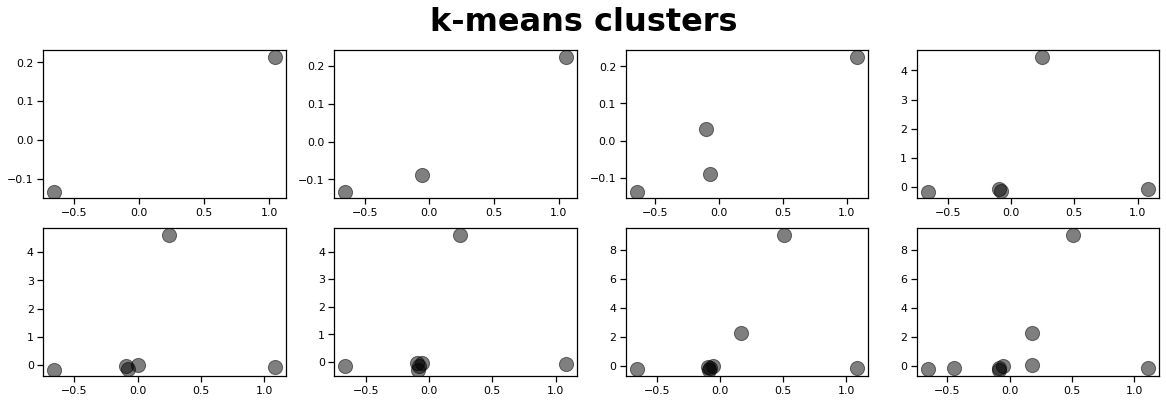

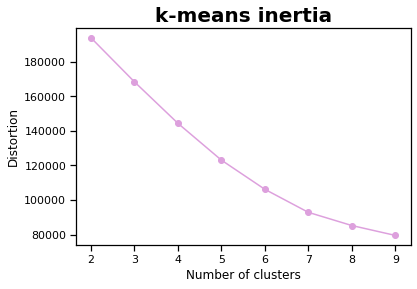

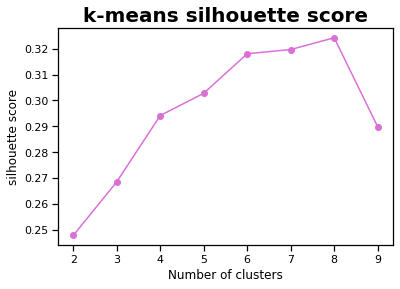

In [ ]:
inertiaList = []
silhouetteList = []

countSubplot = 1
plt.figure(figsize=(20, 6))

for k in range(2, 10):
  # model
  kmeansModel = KMeans(n_clusters=k, random_state=100)
  clustersPred = kmeansModel.fit(trainData)
  inertia = kmeansModel.inertia_
  centers = kmeansModel.cluster_centers_
  silhouetteAvg = silhouette_score(trainData, clustersPred.labels_)
  # repo
  inertiaList.append(inertia)
  silhouetteList.append(silhouetteAvg)
  print("k = {:2d} inertia = {:.6f}  Silhouette Coefficiency Average = {:.6f}".format(k, inertia, silhouetteAvg))
  # chart
  plt.subplot(2, 4, countSubplot)
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
  countSubplot += 1


plt.suptitle("k-means clusters", fontsize = 32, fontweight = 'bold')
plt.show()


plt.plot(range(2, 10), inertiaList, marker='o', color='plum')
plt.title("k-means inertia", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


plt.plot(range(2, 10), silhouetteList, marker='o', color='orchid')
plt.title("k-means silhouette score", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

In [ ]:
# model
k8Model = KMeans(n_clusters=8, init='k-means++')
clusterData['pred'] = k8Model.fit_predict(trainData)
k8centers = k8Model.cluster_centers_

#### 2D散佈圖 & 3D散佈圖

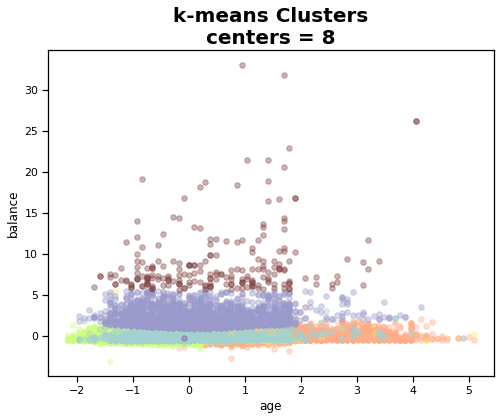

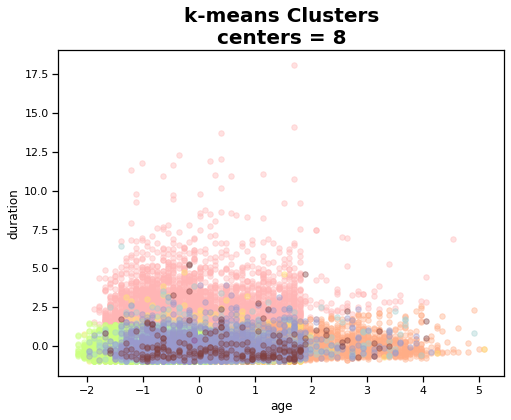

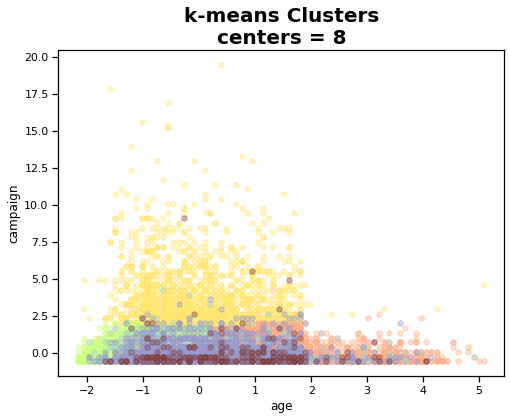

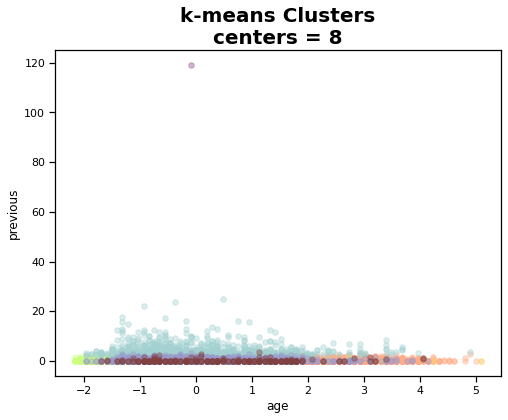

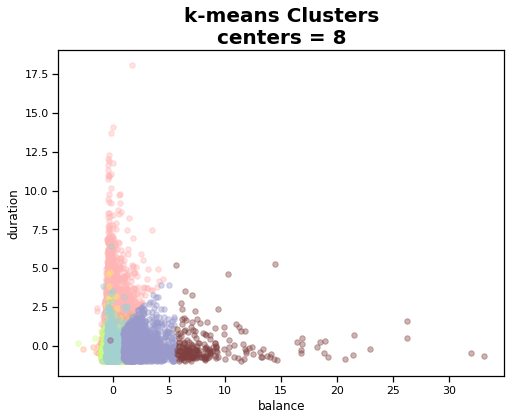

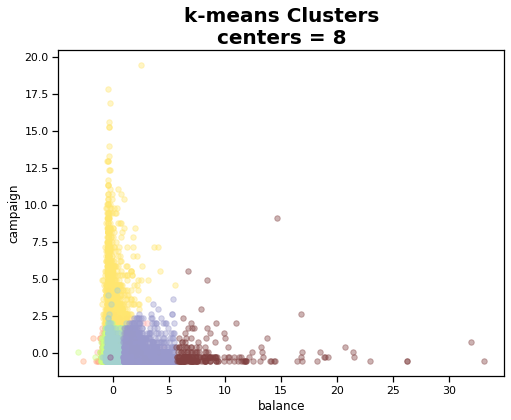

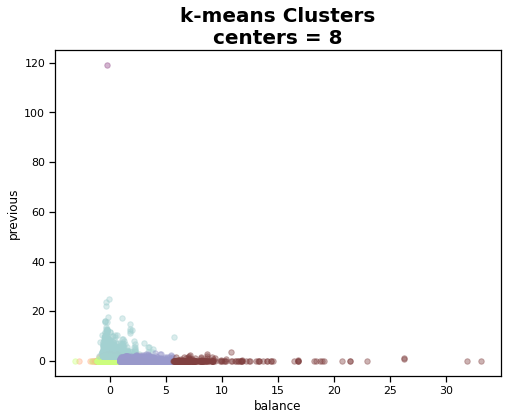

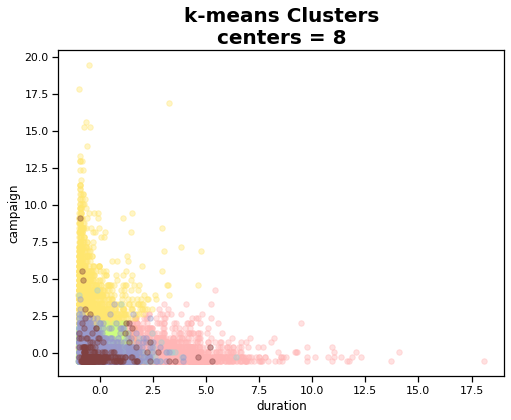

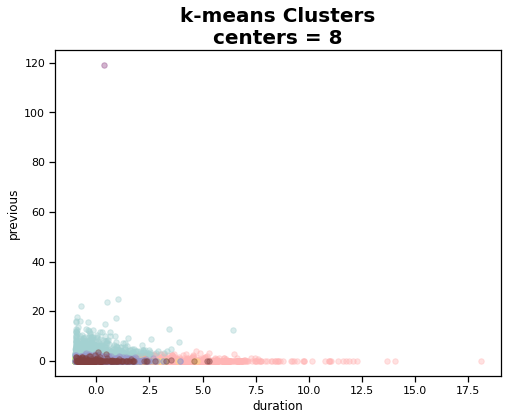

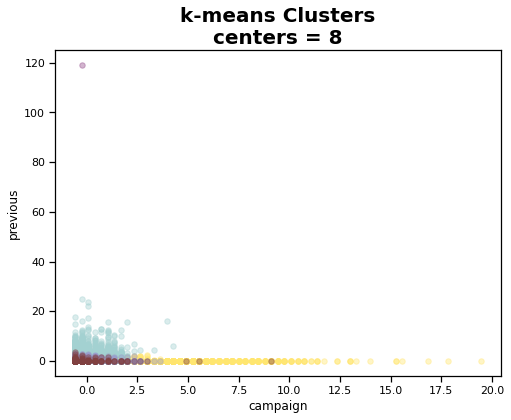

In [ ]:
for xindex in range(len(labelName)-1):
  for j in range(len(labelName)-1):
    yindex = j + (xindex+1)
    if yindex<len(labelName) :
      modelClustersPlt([labelName[xindex], labelName[yindex]], clusterData, clusterData['pred'], "k-means", 8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


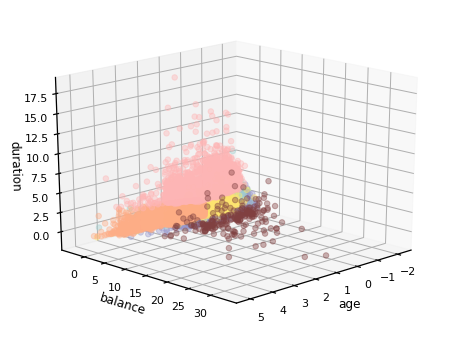

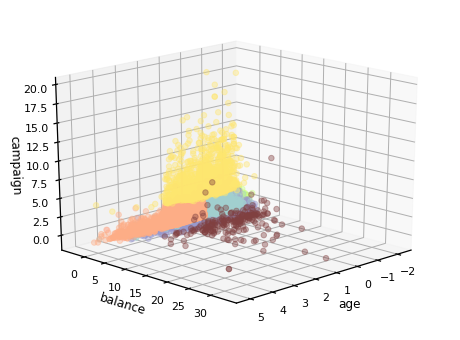

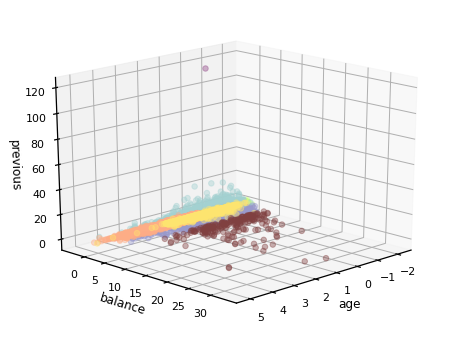

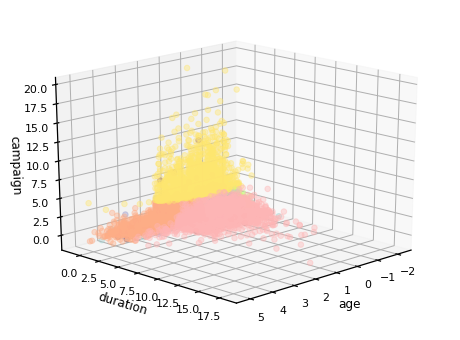

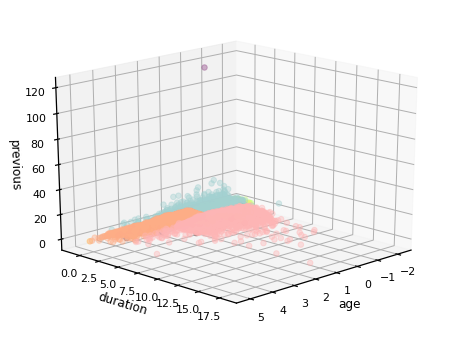

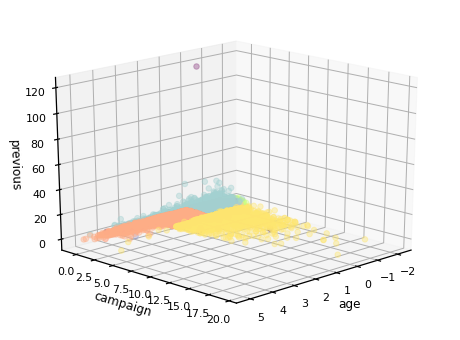

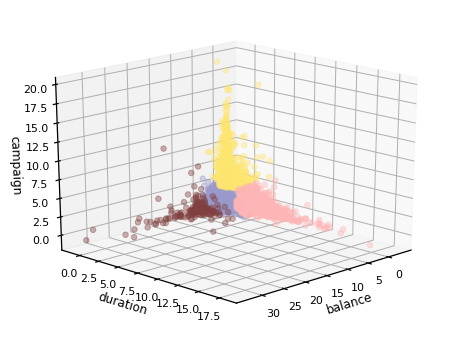

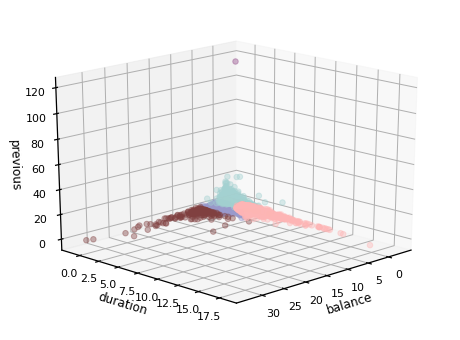

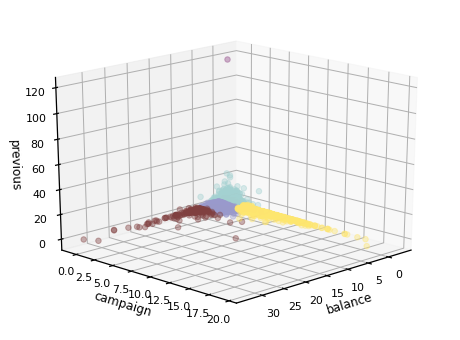

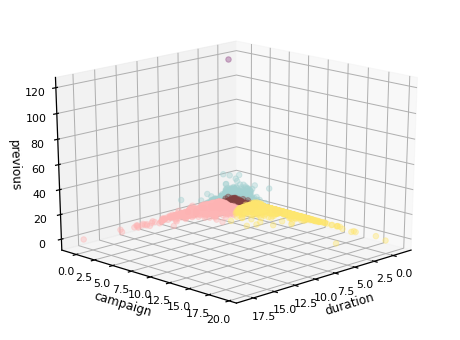

In [ ]:
for xindex in range(len(labelName)-2):
  for j in range(len(labelName)-2):
    yindex = j + (xindex+1)
    for k in range(len(labelName)-2):
      zindex = k + (yindex+1)
      if yindex<len(labelName) and zindex<len(labelName):
        modelClusters3DPlt([labelName[xindex], labelName[yindex], labelName[zindex]], 20, 45, clusterData, clusterData['pred'], "k-means", 8)

#### 長條圖 & 熱度圖

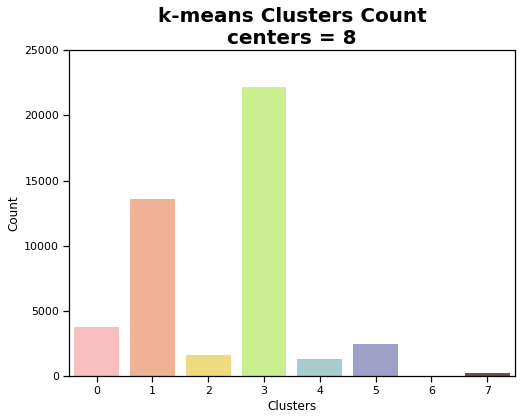

In [ ]:
modelCountPlt(clusterData, "pred", "k-means", 8, 25000)

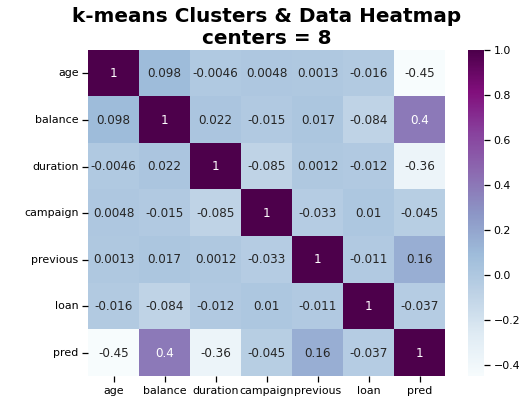

In [ ]:
modelHeatmapPlt(clusterData, "k-means", 8)

### 4 以ward linkage策略的凝聚分群法進行分群

統計每個集群的大小，繪製散佈圖、樹狀圖、熱度圖，並計算輪廓係數、調整蘭德指數。

#### 以 ward linkage 進行分群

In [ ]:
X = subData[trainData.columns]
wardModel = hierarchy.linkage(X, 'ward')

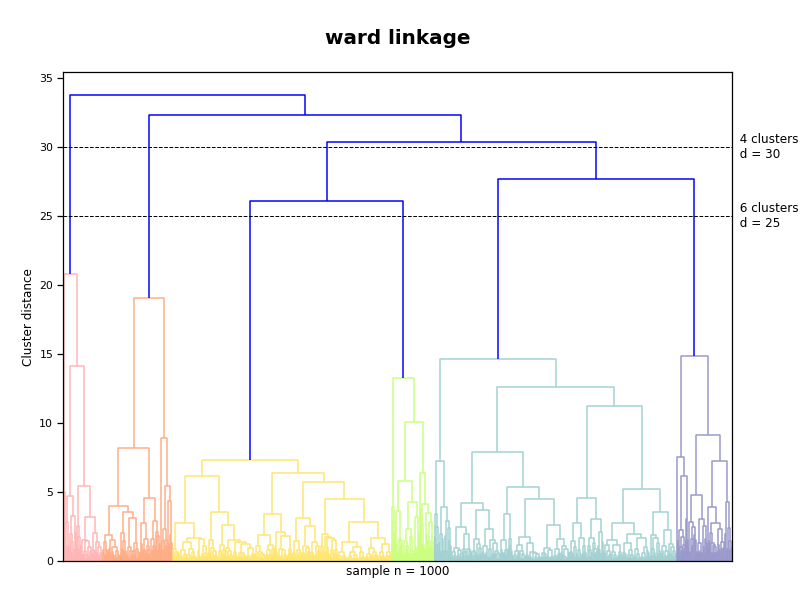

In [ ]:
# 繪製樹狀圖

plt.figure(figsize=(12, 9))
hierarchy.set_link_color_palette(hexColorList)
hierarchy.dendrogram(wardModel, orientation="top", labels=clusterData.index, no_labels=True)

boundList = [35, 30, 28, 25]
lineBold = 1
lineColor = 'black'
lineFontSize = 12

ax = plt.gca()
bounds = ax.get_xbound()

# ax.plot(bounds, [boundList[0], boundList[0]], '--', c=lineColor, lw=lineBold)
# ax.text(bounds[1], boundList[0], '  3 clusters\n  d = {}'.format(boundList[0]), va='center', fontdict={'size':lineFontSize})
ax.plot(bounds, [boundList[1], boundList[1]], '--', c=lineColor, lw=lineBold)
ax.text(bounds[1], boundList[1], '  4 clusters\n  d = {}'.format(boundList[1]), va='center', fontdict={'size':lineFontSize})
# ax.plot(bounds, [boundList[2], boundList[2]], '--', c=lineColor, lw=lineBold)
# ax.text(bounds[1], boundList[2], '  5 clusters\n  d = {}'.format(boundList[2]), va='center', fontdict={'size':lineFontSize})
ax.plot(bounds, [boundList[3], boundList[3]], '--', c=lineColor, lw=lineBold)
ax.text(bounds[1], boundList[3], '  6 clusters\n  d = {}'.format(boundList[3]), va='center', fontdict={'size':lineFontSize})

plt.xlabel("sample n = 1000\n")
plt.ylabel('\nCluster distance')
plt.title('\nward linkage\n', fontsize = 20, fontweight = 'bold')
plt.show()

In [ ]:
# 以距離分群
max_dis = 25
subData['wardPred'] = hierarchy.fcluster(wardModel,max_dis,criterion='distance')

#### 2D散佈圖 & 3D散佈圖

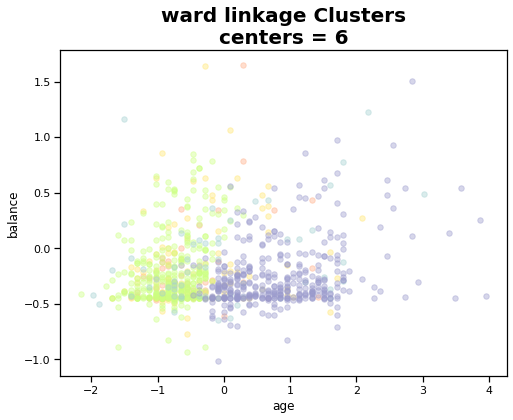

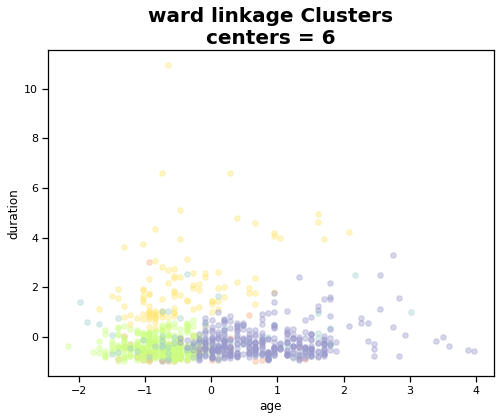

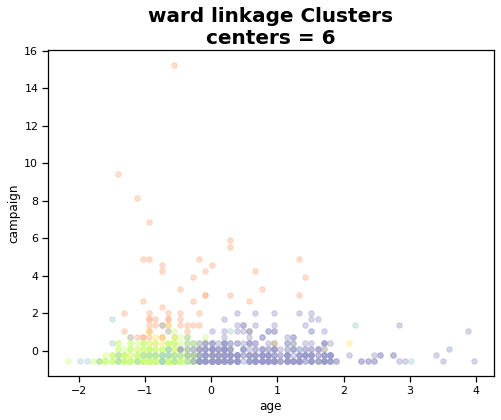

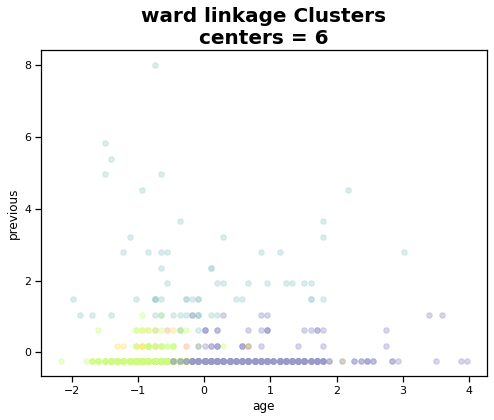

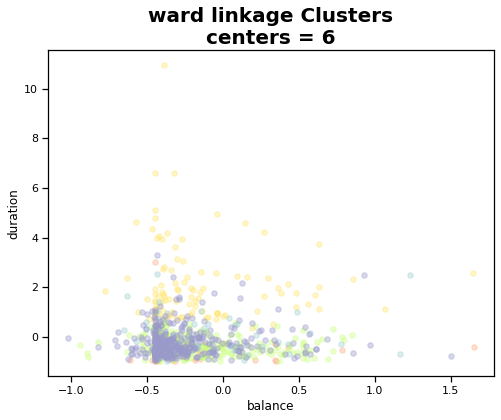

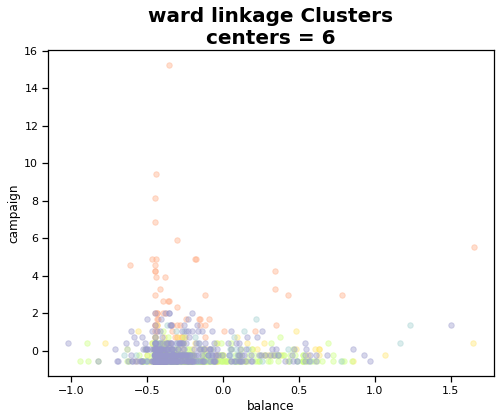

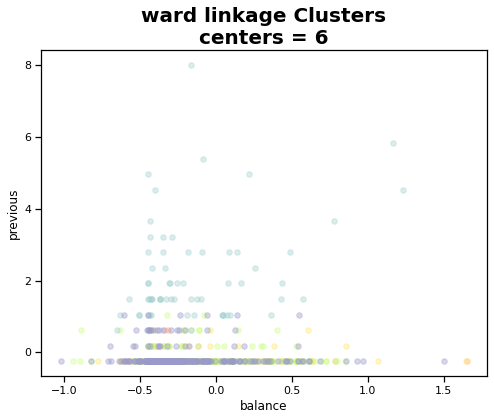

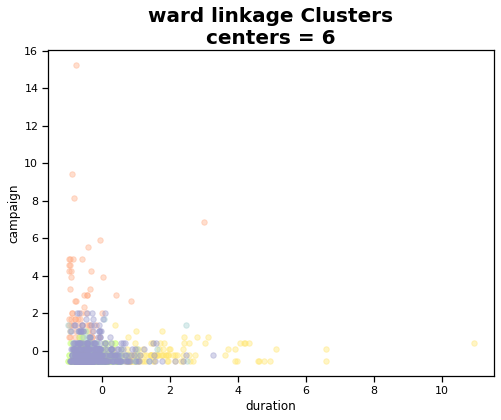

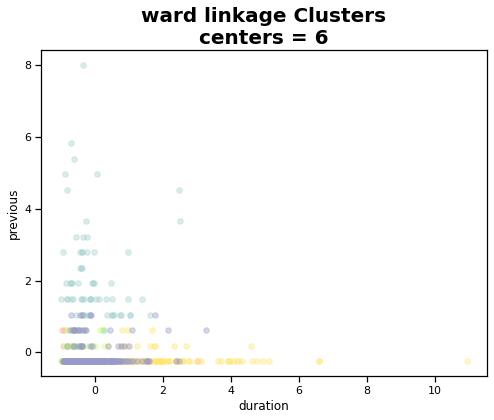

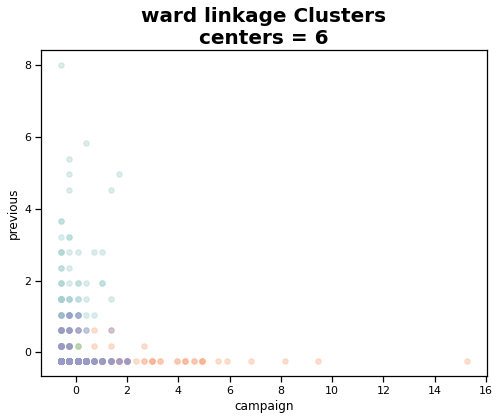

In [ ]:
for xindex in range(len(labelName)-1):
  for j in range(len(labelName)-1):
    yindex = j + (xindex+1)
    if yindex<len(labelName) :
      modelClustersPlt([labelName[xindex], labelName[yindex]], subData, subData['wardPred'], "ward linkage", 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


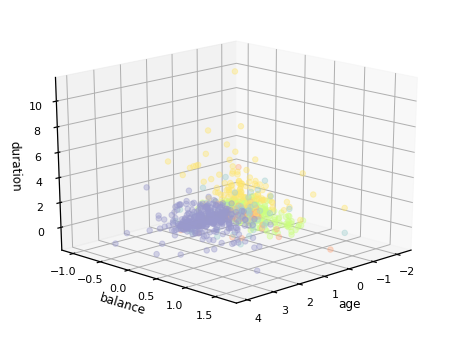

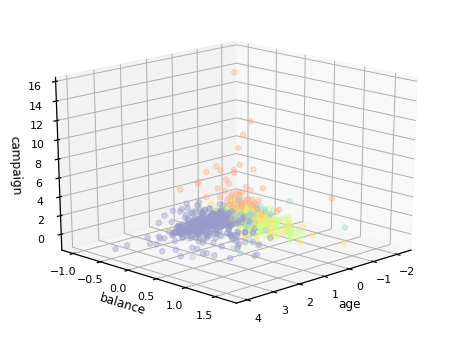

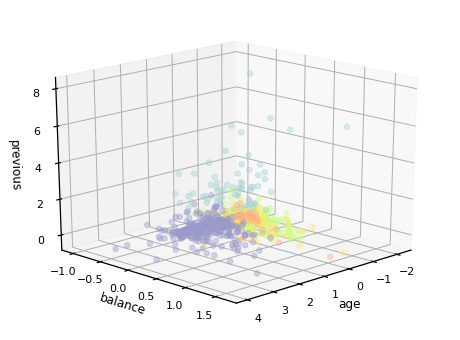

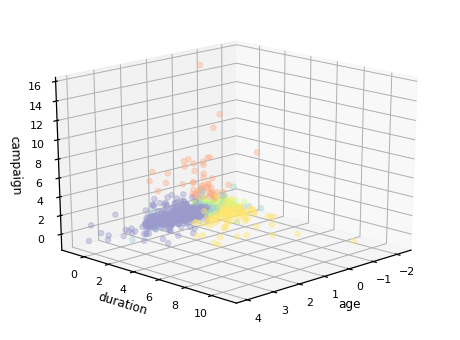

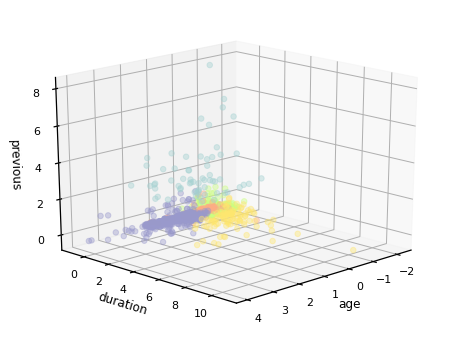

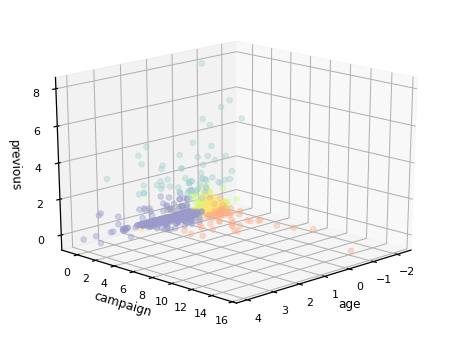

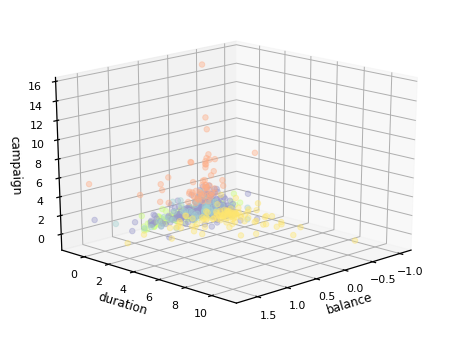

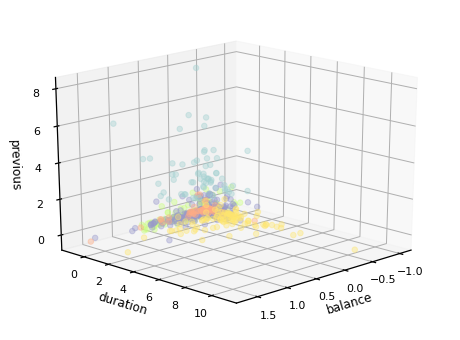

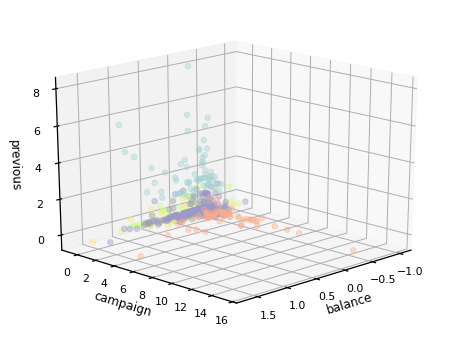

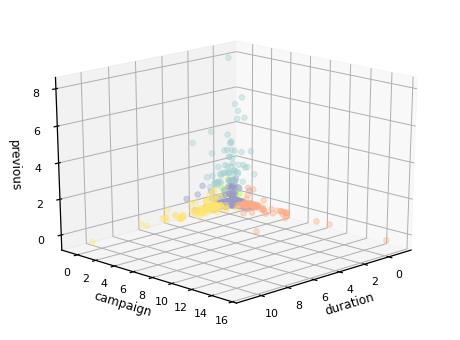

In [ ]:
for xindex in range(len(labelName)-2):
  for j in range(len(labelName)-2):
    yindex = j + (xindex+1)
    for k in range(len(labelName)-2):
      zindex = k + (yindex+1)
      if yindex<len(labelName) and zindex<len(labelName):
        modelClusters3DPlt([labelName[xindex], labelName[yindex], labelName[zindex]], 20, 45, subData, subData['wardPred'], "ward linkage", 6)

#### 長條圖 & 熱度圖

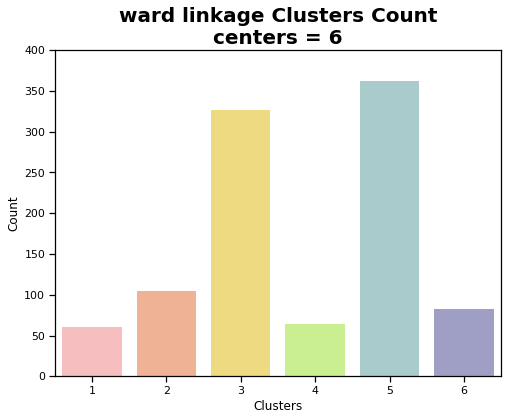

In [ ]:
modelCountPlt(subData, "wardPred", "ward linkage", 6, 400)

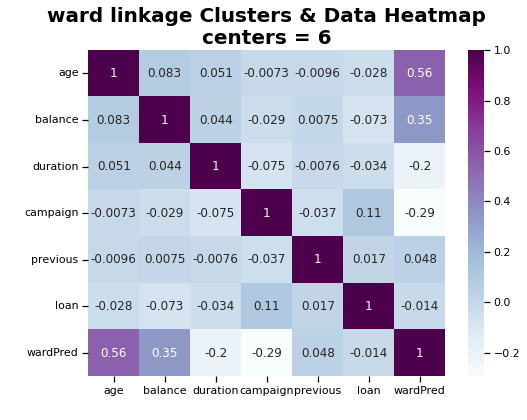

In [ ]:
modelHeatmapPlt(subData, "ward linkage", 6)

### 5 以DBSCAN進行分群

統計每個集群的大小，繪製散佈圖，並計算輪廓係數、調整蘭德指數。

#### 以DBSCAN進行分群

In [ ]:
X = subData[trainData.columns]
dbsModel = DBSCAN(eps=0.3, min_samples=10).fit(X)
subData['dbsPred'] = dbsModel.labels_
print(subData['dbsPred'].astype('category').value_counts())

-1    826
0     116
1      48
2      10
Name: dbsPred, dtype: int64


#### 2D散佈圖 & 3D散佈圖

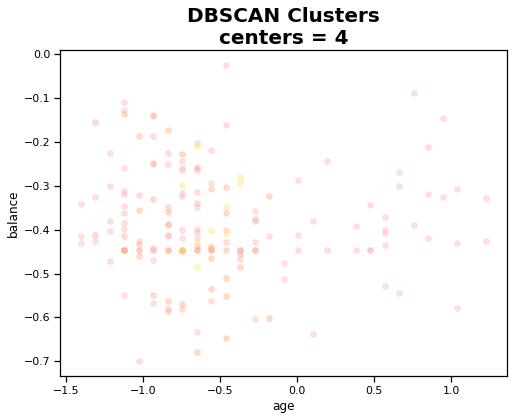

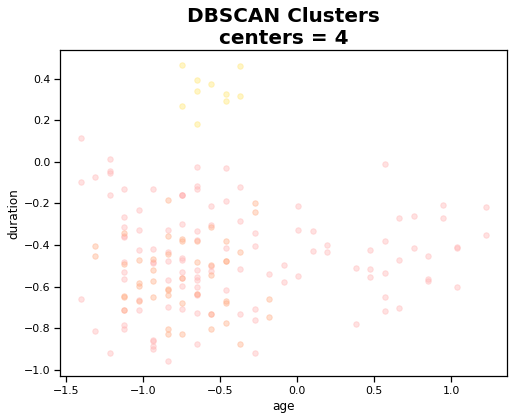

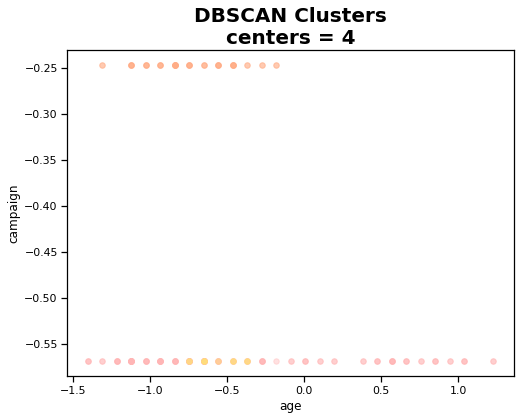

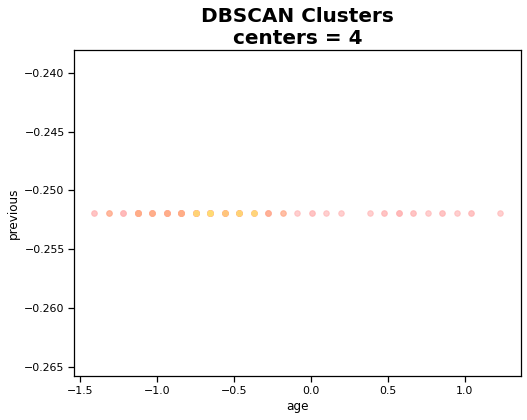

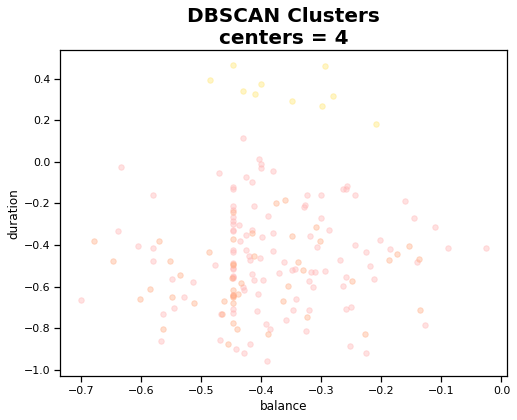

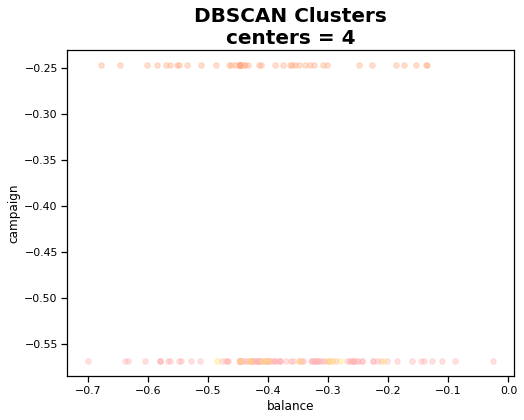

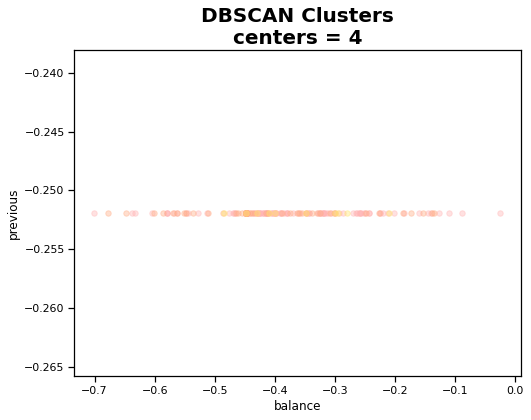

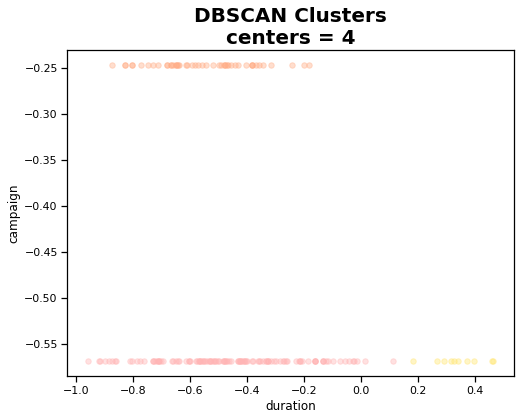

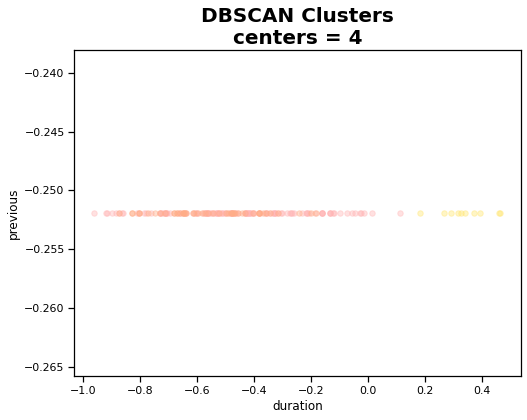

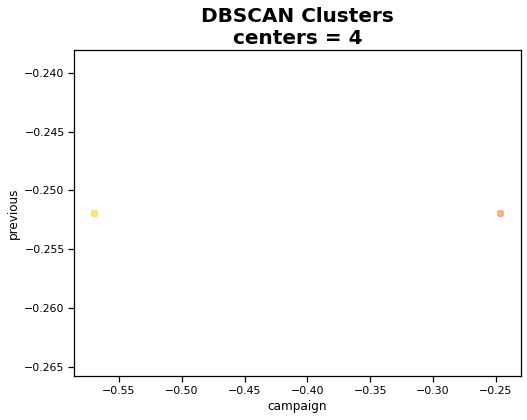

In [ ]:
for xindex in range(len(labelName)-1):
  for j in range(len(labelName)-1):
    yindex = j + (xindex+1)
    if yindex<len(labelName) :
      modelClustersPlt([labelName[xindex], labelName[yindex]], subData, subData['dbsPred'], "DBSCAN", 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


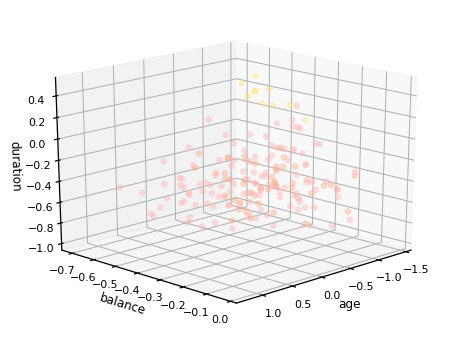

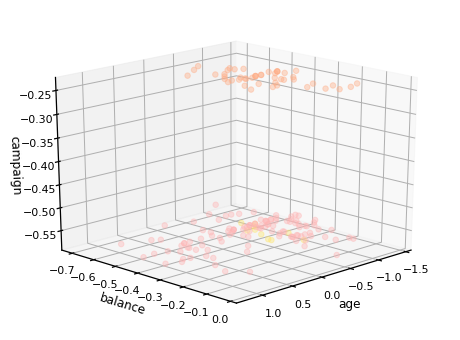

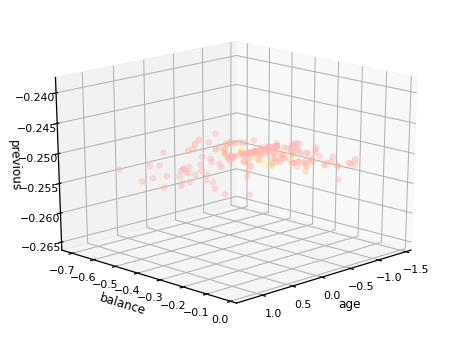

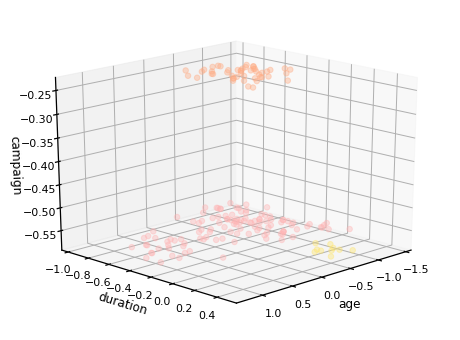

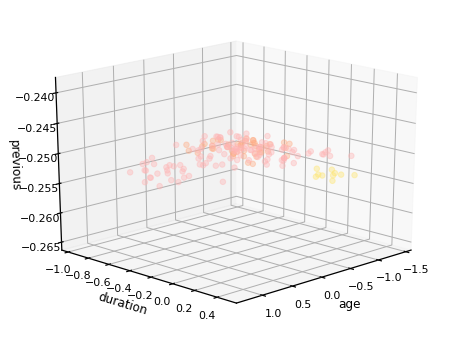

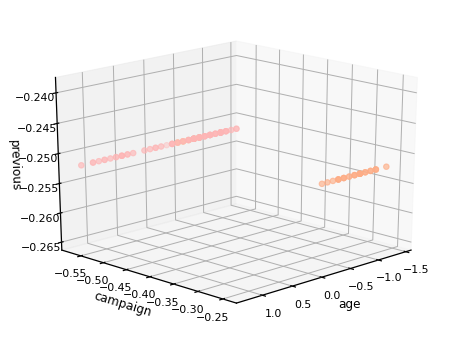

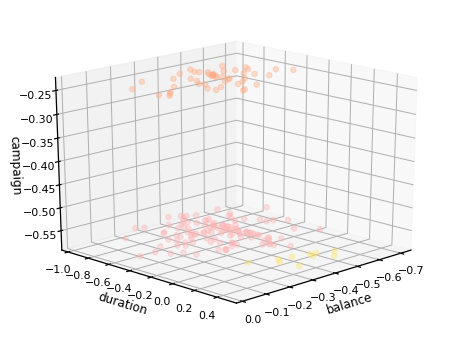

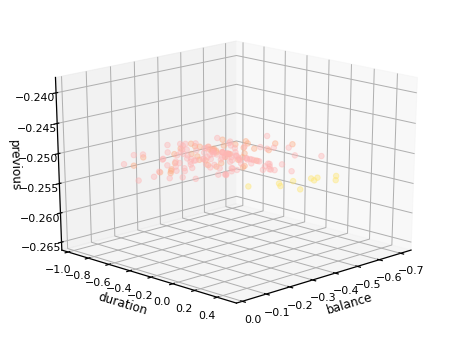

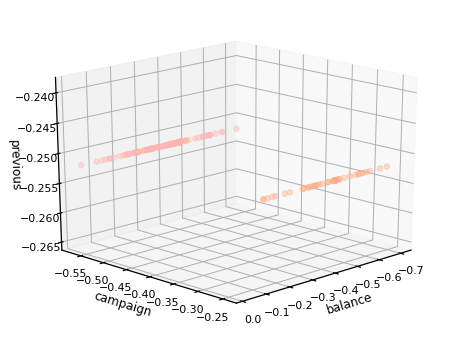

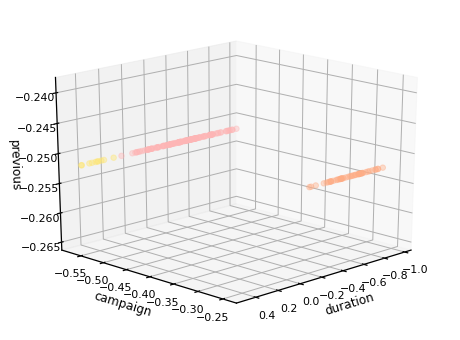

In [ ]:
for xindex in range(len(labelName)-2):
  for j in range(len(labelName)-2):
    yindex = j + (xindex+1)
    for k in range(len(labelName)-2):
      zindex = k + (yindex+1)
      if yindex<len(labelName) and zindex<len(labelName):
        modelClusters3DPlt([labelName[xindex], labelName[yindex], labelName[zindex]], 20, 45, subData, subData['dbsPred'], "DBSCAN", 4)

#### 長條圖 & 熱度圖

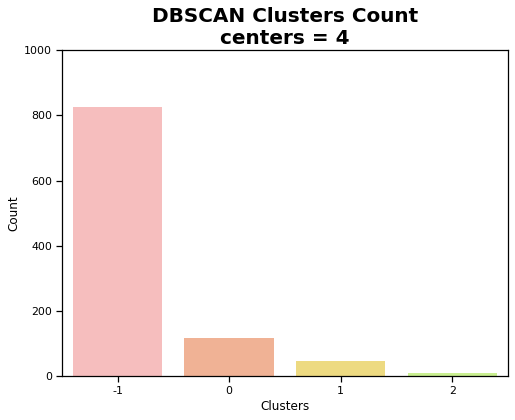

In [ ]:
modelCountPlt(subData, "dbsPred", "DBSCAN", 4, 1000)

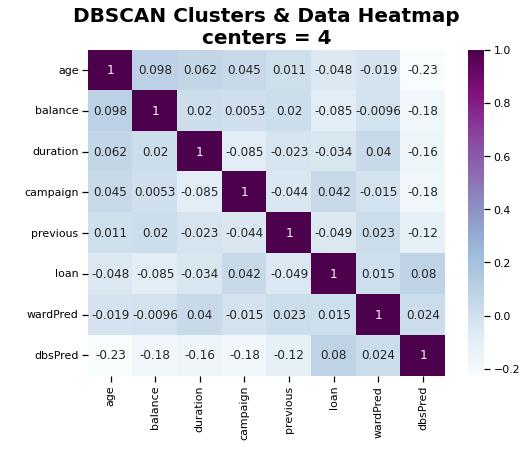

In [ ]:
modelHeatmapPlt(subData, "DBSCAN", 4)

### 6 以鄰近傳播進行分群

統計每個集群的大小，繪製散佈圖，並計算輪廓係數、調整蘭德指數。

#### 以鄰近傳播進行分群

In [ ]:
X = subData[trainData.columns]
affModel = AffinityPropagation()
subData['affPred'] = affModel.fit_predict(X)
print("centers n = ", len(subData['affPred'].astype('category').value_counts()), "\n")
print(subData['affPred'].astype('category').value_counts()[0:8])

centers n =  70 

14    49
27    47
1     45
52    44
61    44
60    39
30    39
33    36
Name: affPred, dtype: int64


#### 2D散佈圖 & 3D散佈圖

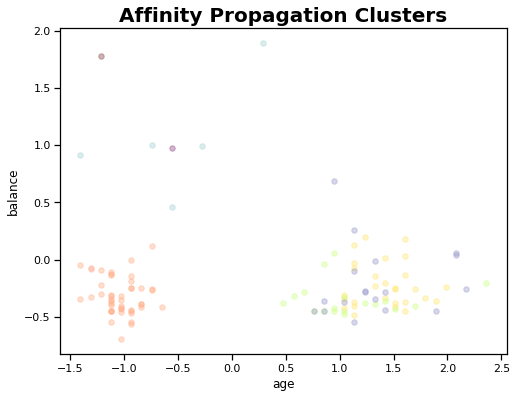

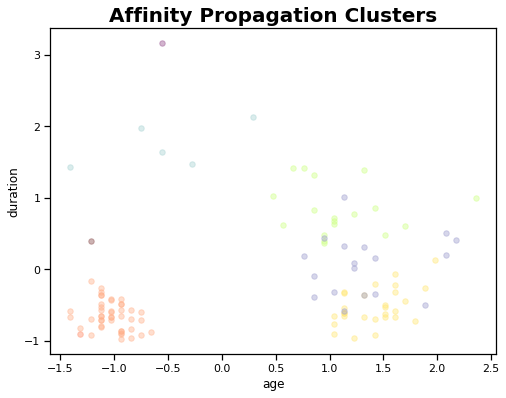

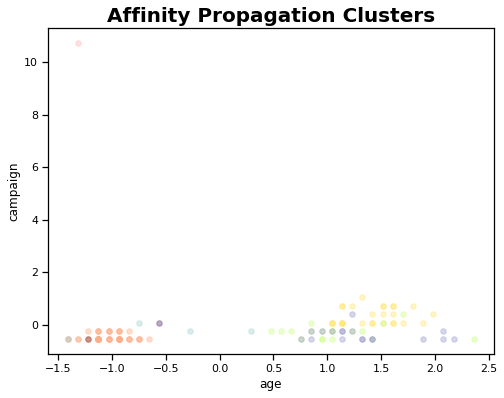

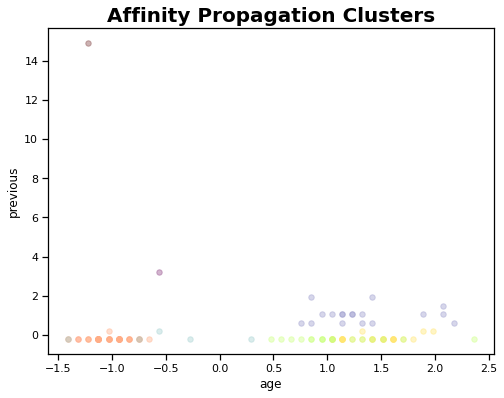

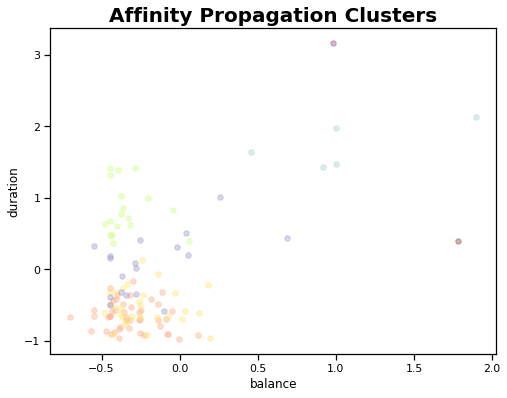

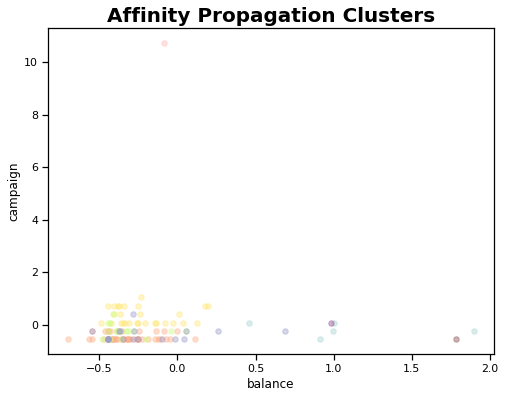

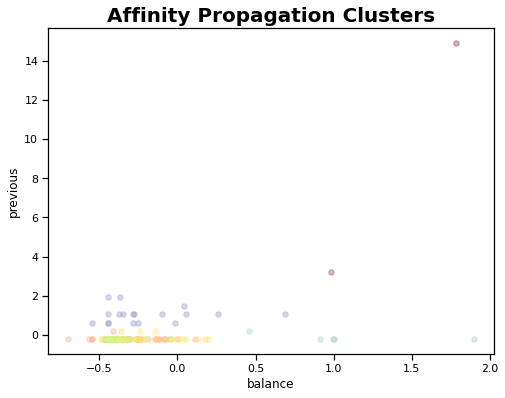

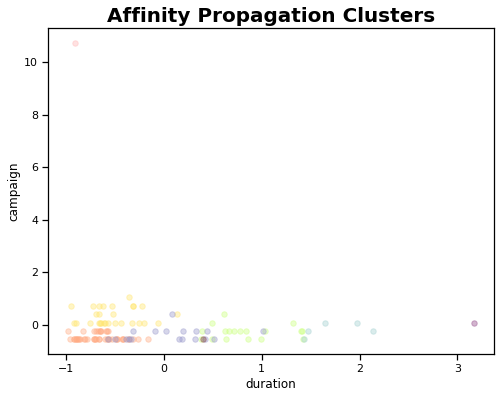

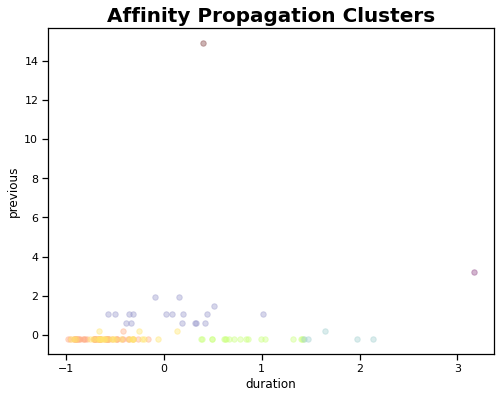

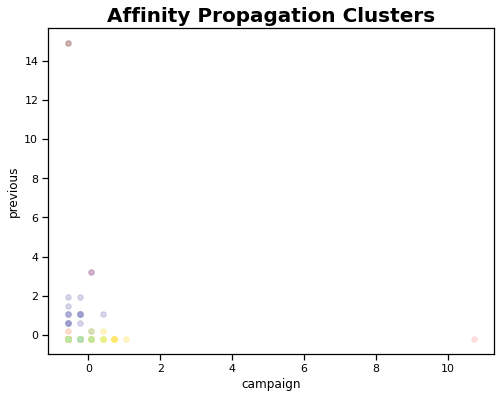

In [ ]:
for xindex in range(len(labelName)-1):
  for j in range(len(labelName)-1):
    yindex = j + (xindex+1)
    if yindex<len(labelName) :
      modelClustersPlt([labelName[xindex], labelName[yindex]], subData, subData['affPred'], "Affinity Propagation", 8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


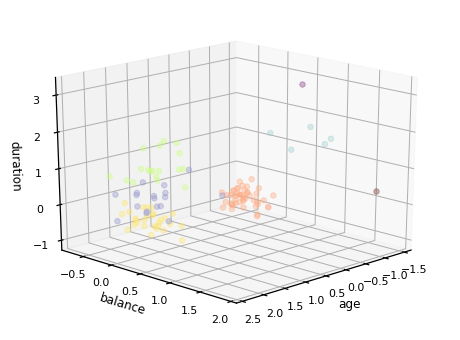

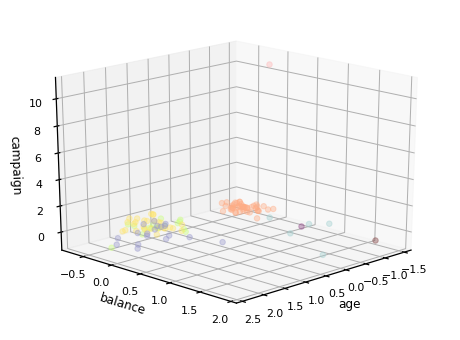

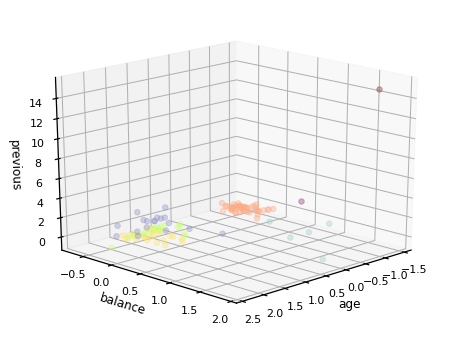

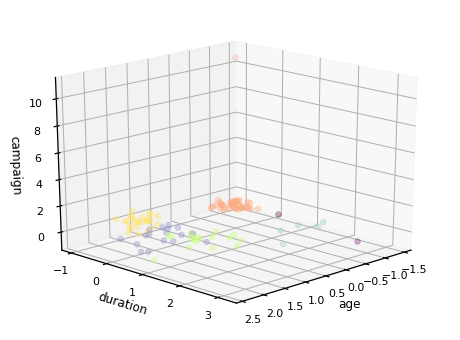

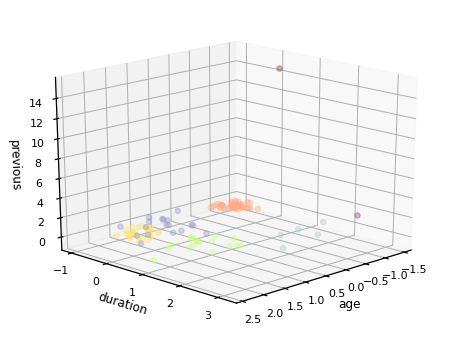

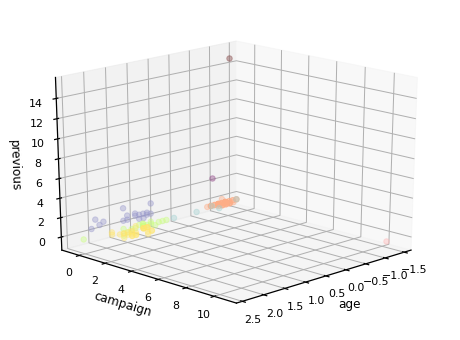

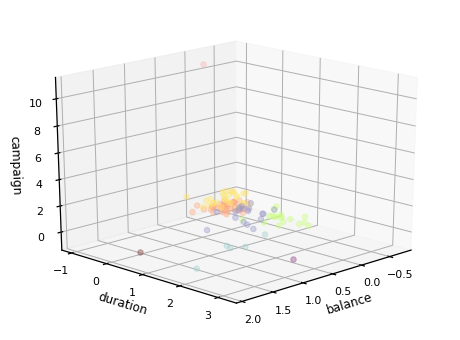

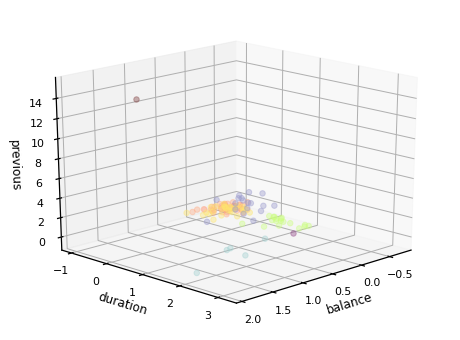

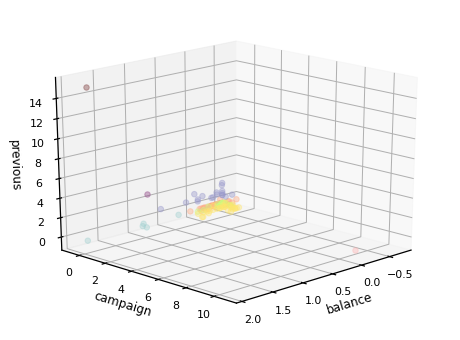

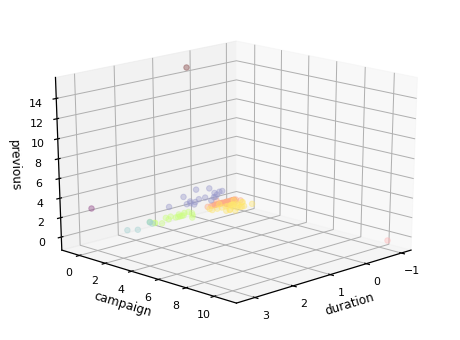

In [ ]:
for xindex in range(len(labelName)-2):
  for j in range(len(labelName)-2):
    yindex = j + (xindex+1)
    for k in range(len(labelName)-2):
      zindex = k + (yindex+1)
      if yindex<len(labelName) and zindex<len(labelName):
        modelClusters3DPlt([labelName[xindex], labelName[yindex], labelName[zindex]], 20, 45, subData, subData['affPred'], "Affinity Propagation", 8)

#### 長條圖 & 熱度圖

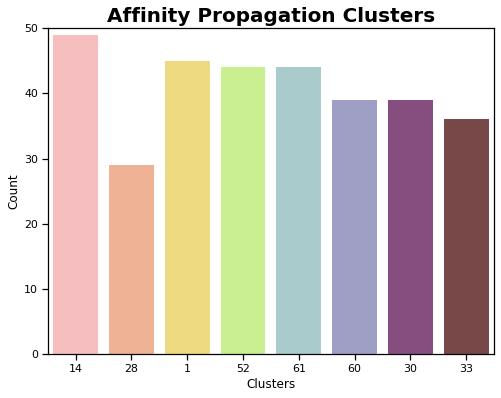

In [ ]:
modelCountPlt(subData, "affPred", "Affinity Propagation", 0, 50)

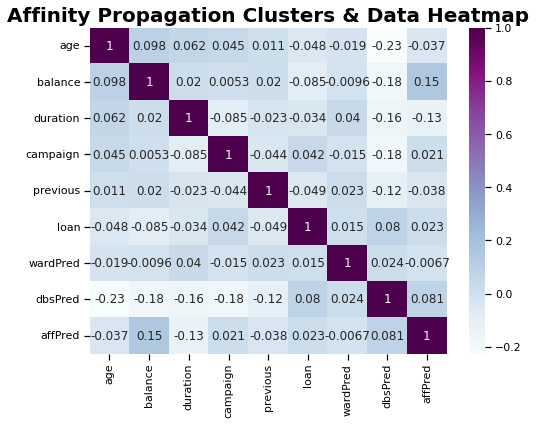

In [ ]:
modelHeatmapPlt(subData, "Affinity Propagation", 0)

### 7 以表格彙整4種分群方法的結果，並進行綜合分析。

詳見紙本報告OuO